In [ ]:
pip install keras==2.12.0


In [ ]:
pip install tensorflow==2.12.0

In [ ]:
!unrar x -Y "/content/images.rar" "/content/"


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/images.rar

Extracting  /content/images/train/angry/0.jpg                              0%  OK 
Extracting  /content/images/train/angry/1.jpg                              0%  OK 
Extracting  /content/images/train/angry/10.jpg                             0%  OK 
Extracting  /content/images/train/angry/10002.jpg                          0%  OK 
Extracting  /content/images/train/angry/10016.jpg                          0%  OK 
Extracting  /content/images/train/angry/10037.jpg                          0%  OK 
Extracting  /content/images/train/angry/10038.jpg                          1%  OK 
Extracting  /content/images/train/angry/10057.jpg                          1%  OK 
Extracting  /content/images/train/angry/10063.jpg                          1%  OK 
Extracting  /content/images/train/angry/10069.jpg          

In [ ]:
train_data_dir = '/content/images/train'
val_data_dir = '/content/images/validation'

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Definimos algunos parámetros importantes
width_shape = 48
height_shape = 48
num_classes = 7
epochs = 5
batch_size = 32
class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']

# Configuramos el dataset de entrenamiento y validación
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=True)

val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=True)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Input, AveragePooling2D,Activation
from tensorflow.keras.optimizers import legacy

model = Sequential()

## Extracción de Características
model.add(Conv2D(32,(3,3),padding = 'same',input_shape = (width_shape,height_shape,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(128,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout (0.2))

model.add(Conv2D(256,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

## Clasificación
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# Revisamos el modelo CNN
model.summary()

# Compilamos y estamos listos para el entrenamiento
opt = legacy.Adam(learning_rate=1e-4, decay=1e-4 / epochs)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        5

In [ ]:
# Configuración Tensorboard
from tensorflow.keras.callbacks import TensorBoard
import datetime, os

%load_ext tensorboard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(logdir, histogram_freq=1)

In [ ]:
# Entrenamiento de la red
model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    steps_per_epoch=train_generator.n//batch_size,
    validation_steps=val_generator.n//batch_size,
    callbacks=[tensorboard_callback])

Epoch 1/5
900/900 [==============================] - 28s 20ms/step - loss: 1.9922 - accuracy: 0.2203 - val_loss: 1.7773 - val_accuracy: 0.2790
Epoch 2/5
900/900 [==============================] - 20s 22ms/step - loss: 1.8262 - accuracy: 0.2767 - val_loss: 1.7138 - val_accuracy: 0.3423
Epoch 3/5
900/900 [==============================] - 17s 19ms/step - loss: 1.7062 - accuracy: 0.3323 - val_loss: 1.5641 - val_accuracy: 0.3896
Epoch 4/5
900/900 [==============================] - 19s 21ms/step - loss: 1.6270 - accuracy: 0.3669 - val_loss: 1.5027 - val_accuracy: 0.4243
Epoch 5/5
900/900 [==============================] - 20s 22ms/step - loss: 1.5670 - accuracy: 0.3909 - val_loss: 1.4984 - val_accuracy: 0.4278


In [ ]:
model.save("modelFEC.h5")


1/1 [==============================] - 0s 31ms/step
happy


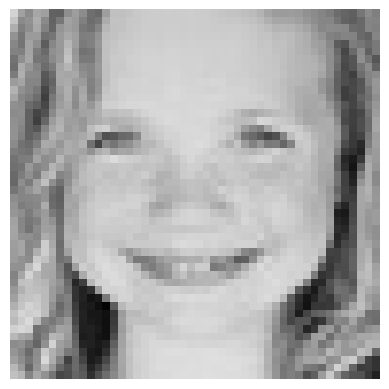

In [ ]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

faces = []

# Cargamos una imagen del directorio
imaget_path = "/content/images/train/happy/62.jpg"

# Redimensionamos la imagen y convertimos a gray
face = cv2.cvtColor(cv2.imread(imaget_path), cv2.COLOR_BGR2GRAY)
face = cv2.resize(face, (48, 48))
face2 = img_to_array(face)
face2 = np.expand_dims(face2,axis=0)

faces.append(face2)

# El modelo estima la predicción
preds = model.predict(faces)

print(class_names[np.argmax(preds)])
plt.imshow(cv2.cvtColor(np.asarray(face),cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Found 7066 images belonging to 7 classes.
221/221 [==============================] - 3s 14ms/step
              precision    recall  f1-score   support

           0     0.5800    0.5250    0.5511       960
           1     0.7048    0.6667    0.6852       111
           2     0.6180    0.3988    0.4848      1018
           3     0.7889    0.8805    0.8322      1825
           4     0.5837    0.5880    0.5858      1216
           5     0.4848    0.5751    0.5261      1139
           6     0.7494    0.7729    0.7610       797

    accuracy                         0.6477      7066
   macro avg     0.6442    0.6296    0.6323      7066
weighted avg     0.6458    0.6477    0.6419      7066



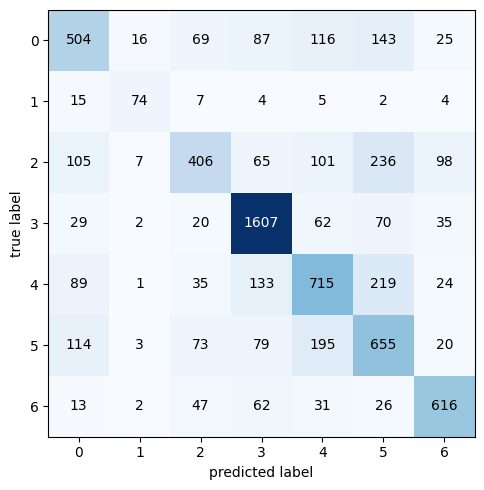

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
import numpy as np

# Configuración del dataset de validación sin shuffle
val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow_from_directory(
    val_data_dir,
    target_size=(width_shape, height_shape),
    batch_size=batch_size,
    color_mode='grayscale',
    class_mode='categorical',shuffle=False)

predictions = model.predict(val_generator)
y_pred = np.argmax(predictions, axis=1)
y_real = val_generator.classes

matc=confusion_matrix(y_real, y_pred)

plot_confusion_matrix(conf_mat=matc, figsize=(5,5), show_normed=False)
plt.tight_layout()

print(metrics.classification_report(y_real,y_pred, digits = 4))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')